___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [37]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data



In [38]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [39]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [40]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [41]:
# Checking the shape of one image
x_train[9].shape

(28, 28)

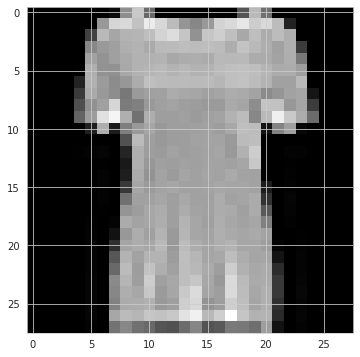

In [42]:
plt.imshow(x_train[10],cmap='gray')

In [43]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [44]:
y_train[10]

0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


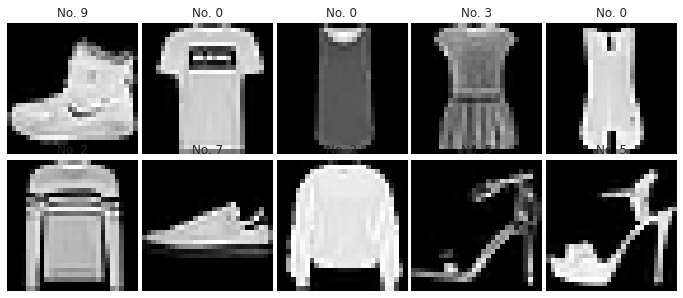

In [45]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( x_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing



In [46]:
x_train[10].min()

0

In [47]:
x_train[10].max()

255

In [48]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

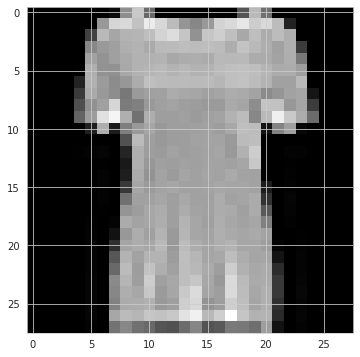

In [49]:
plt.imshow(x_train[10],cmap='gray')

In [50]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [51]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [52]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [53]:
from tensorflow.keras.utils import to_categorical

In [54]:
y_train[9]

5

In [55]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [56]:
y_train[10]

0

In [57]:
Y_train[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

##  Model Training

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [59]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1372)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [66]:
model.fit(x_train, Y_train, batch_size=32, epochs=30, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3344 - accuracy: 0.8796 - val_loss: 0.3122 - val_accuracy: 0.8873
Epoch 2/30
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2660 - accuracy: 0.9024 - val_loss: 0.2812 - val_accuracy: 0.9004
Epoch 3/30
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2273 - accuracy: 0.9160 - val_loss: 0.2631 - val_accuracy: 0.9077
Epoch 4/30
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2027 - accuracy: 0.9240 - val_loss: 0.2596 - val_accuracy: 0.9090
Epoch 5/30
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1775 - accuracy: 0.9346 - val_loss: 0.2780 - val_accuracy: 0.9029
Epoch 6/30
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1586 - accuracy: 0.9413 - val_loss: 0.2439 - val_accuracy: 0.9139
Epoch 7/30
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1419 - accuracy: 0.9473 - val_loss: 0.2583 -

**TASK 7: Plot values of metrics you used in your model.**

In [67]:
model.metrics_names

['loss', 'accuracy']

In [68]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.334,0.880,0.312,0.887
1,0.266,0.902,0.281,0.900
2,0.227,0.916,0.263,0.908
3,0.203,0.924,0.260,0.909
4,0.177,0.935,0.278,0.903


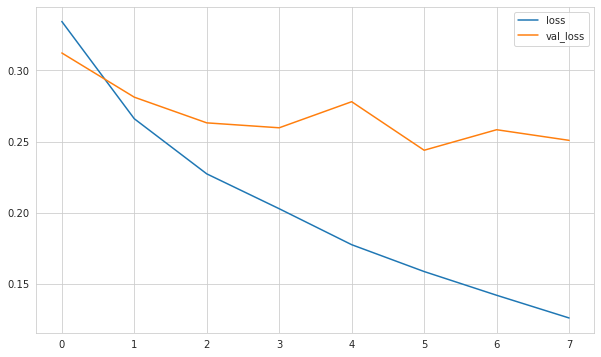

In [69]:
summary[["loss", "val_loss"]].plot();

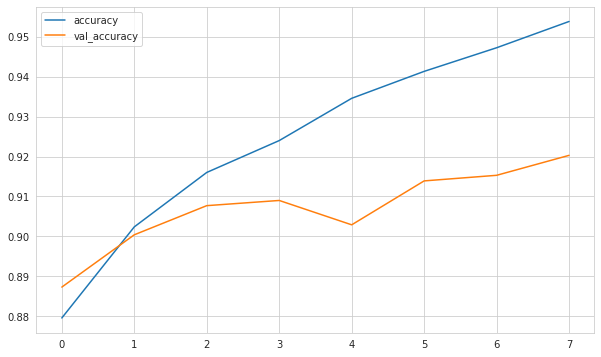

In [70]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation



In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2439 - accuracy: 0.9139


[0.24386046826839447, 0.9139000177383423]

In [74]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24386046826839447
Test accuracy: 0.9139000177383423


In [75]:
pred_prob = model.predict(x_test)

In [76]:
y_pred = np.argmax(pred_prob, axis=1)

In [77]:
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.82      0.90      0.86      1000
           3       0.94      0.90      0.92      1000
           4       0.87      0.82      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.77      0.73      0.75      1000
           7       0.95      0.98      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [79]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [80]:
print(confusion_matrix(y_test, y_pred))

[[891   0  19  11   2   0  73   0   4   0]
 [  0 992   0   5   2   0   0   0   1   0]
 [ 18   1 896   4  29   0  52   0   0   0]
 [ 21   7  15 903  25   0  29   0   0   0]
 [  2   1  95  18 823   0  61   0   0   0]
 [  0   0   0   0   0 978   0  15   0   7]
 [120   2  67  18  61   0 729   0   3   0]
 [  0   0   0   0   0   3   0 984   0  13]
 [  6   1   1   0   3   1   3   1 984   0]
 [  0   0   0   0   0   5   1  35   0 959]]


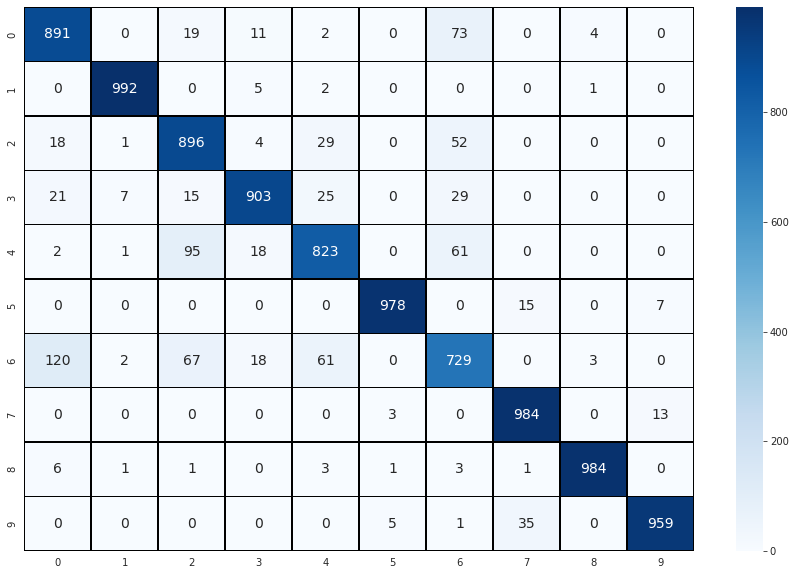

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

## Prediction

In [84]:
my_image = x_test[50]

In [85]:
my_image.shape

(28, 28, 1)

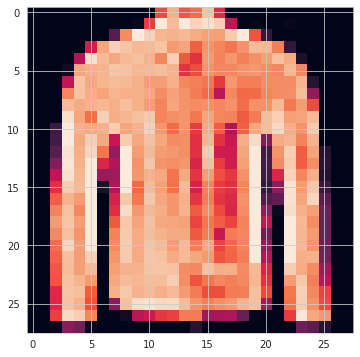

In [88]:
plt.imshow(my_image.reshape(28,28))

In [89]:
pred_prob = model.predict(my_image.reshape(1,28,28,1))
pred_prob

array([[1.0292241e-04, 1.9936229e-07, 2.8726002e-03, 3.6270133e-06,
        9.2998439e-01, 2.0312305e-07, 6.7035548e-02, 3.1079057e-07,
        7.8431547e-08, 1.8970961e-07]], dtype=float32)

In [90]:
y_pred = np.argmax(pred_prob)
y_pred

4

In [91]:
model.save("cnn-1.h")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___